## Understanding Decision Trees
What is a Decision Tree?
A Decision Tree is a type of supervised machine learning algorithm used for both classification and regression tasks. It works like a flowchart structure where each internal node represents a decision based on a feature, each branch represents an outcome of the decision, and each leaf node represents a final prediction or result. Decision Trees model decisions and their possible consequences by learning simple decision rules inferred from the data features.

Why Use Decision Trees?
Easy to Understand and Interpret: The model's flowchart-like structure makes it easy to visualize and understand, even for people without a strong background in machine learning.
No Need for Feature Scaling: Unlike algorithms such as SVM or KNN, Decision Trees do not require normalization or scaling of data.
Handles Both Types of Data: They can work with both numerical and categorical data.
Minimal Data Preparation: Requires less data cleaning compared to other algorithms. Missing values and outliers often do not significantly impact their performance.
Real-World Applications
Medical Diagnosis: Used to predict diseases or health conditions based on patient data.
Credit Risk Analysis: Helps financial institutions decide whether to approve or deny loans based on an applicant's credit history.
Customer Segmentation: Used in marketing to classify customer behavior and target specific groups.
Fraud Detection: Detects fraudulent activities by analyzing patterns in transactional data.
Recommendation Systems: Suggests products or services based on user preferences and historical data.

Anatomy of a Decision Tree:

Root Node
The topmost node in a decision tree. It represents the entire dataset, which is then split into subsets based on a specific feature. The root node acts as the starting point for making decisions.

Internal Nodes (Decision Nodes)
These are nodes that represent tests or decisions on an attribute. Based on the outcomes of these decisions, the tree splits further into branches.

Leaf Nodes (Terminal Nodes)
These are the final nodes of a decision tree that provide the output label or prediction. Once data reaches a leaf node, the decision-making process ends.

Branches (Edges)
The branches represent the outcome of a decision and lead to the next node (which can be another decision node or a leaf node).



How Decision Trees Work
Splitting the Dataset
At each node, the data is divided into subsets based on specific feature conditions. The goal is to create child nodes that are more homogeneous (i.e., contain more similar instances) than the parent node.
Selecting the Best Splits
Decision Trees use different algorithms to determine the best attribute and split point:
Gini Impurity: Measures the frequency of incorrect classifications.
Entropy and Information Gain: Measures the amount of information a split provides.
The feature and threshold that provide the highest information gain or lowest impurity are selected.
Recursive Partitioning
The splitting process is applied recursively to each child node until one of the stopping criteria is met:
All records in a node belong to the same class.
There are no remaining features to split on.
The maximum tree depth is reached.
The node contains fewer records than the minimum sample split threshold.
Tree Depth and Stopping Conditions
Decision Trees can grow very deep, which may lead to overfitting. Stopping criteria and hyperparameters such as max_depth, min_samples_split, and min_samples_leaf help prevent this.
Stopping conditions ensure:
The model does not overfit by growing unnecessarily complex trees.
The model maintains a balance between bias and variance.

In [82]:
import matplotlib.pyplot as plt
# Building a basic Decision Tree
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [83]:
# preparing the data
from sklearn.datasets import load_iris

# Prepare data
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [85]:
# Predict and evaluate
predictions = clf.predict(X_test)
print("Predictions:", predictions)
print("Accuracy:", clf.score(X_test, y_test) * 100)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy: 100.0


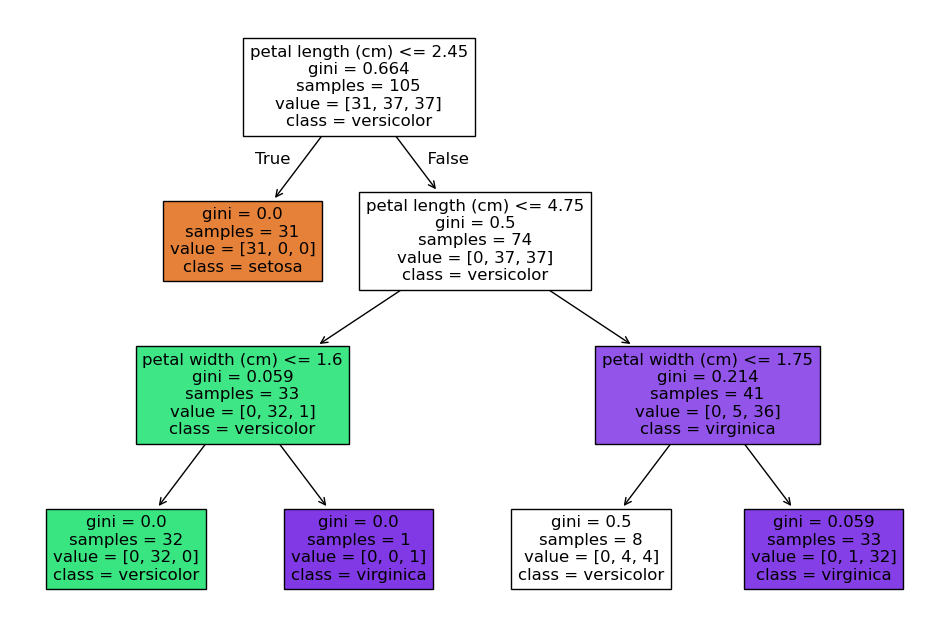

In [86]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [87]:
# Cross-Validation to check for consistent accuracy
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean Accuracy: 0.9733333333333334


# Advanced Decision Tree & Ensemble Workflow
We will now be learning about common preprocessing techniques for Decision Trees and how to use them effectively.

In [88]:
# Libs for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# Finding the data path
file_path = os.path.expanduser('~/Downloads/adult.csv')

# Load the CSV file
data = pd.read_csv(file_path)

# Now you can inspect it!
print(data.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [93]:
# Data Preprocessing
# Check for missing values and filling with median
data.isnull().sum()

# Separate features and target
X = data.drop('income', axis=1)
y = data['income']

# Check the columns first
print(data.columns.tolist())

# Create and fit label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Define numerical and categorical features
numerical_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = [col for col in X.columns if col not in numerical_features]

# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

#Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)




['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [94]:
from sklearn.tree import DecisionTreeClassifier

# Combine preprocessor and classifier
tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
# Train and Evaluate
tree_pipeline.fit(X_train, y_train)
print("Decision Tree Accuracy:", tree_pipeline.score(X_test, y_test))


Decision Tree Accuracy: 0.817238790691326


In [91]:
# from sklearn.ensemble import RandomForestClassifier
#
# # using random forest to reduce overfit and making the accuracy higher
# rf_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
# ])
#
# rf_pipeline.fit(X_train, y_train)
# print("Random Forest Accuracy:", rf_pipeline.score(X_test, y_test))


Random Forest Accuracy: 0.8581177915785163


In [92]:
# import xgboost as xgb
#
# # boosting to make accuracy higher
# xgb_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('classifier',
#      xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss',
#                        random_state=42))
# ])
#
# xgb_pipeline.fit(X_train, y_train)
# print("XGBoost Accuracy:", xgb_pipeline.score(X_test, y_test))


/home/captainl/miniforge3/envs/ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:27:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8695147751313724


In [95]:
#stacked model of XgBoost and Random Forest
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define base learners
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False,
                        eval_metric='logloss')

# Create the stack with a Logistic Regression as the final model
stack = StackingClassifier(
    estimators=[
        ('rf', random_forest),
        ('xgb', xgboost)
    ],
    final_estimator=LogisticRegression()
)

# Pipeline with preprocessor + stacking ensemble
stack_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', stack)
])

# Train it
stack_pipeline.fit(X_train, y_train)

# Evaluate it
print("Stacking Ensemble Accuracy:", stack_pipeline.score(X_test, y_test))


/home/captainl/miniforge3/envs/ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:30:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/captainl/miniforge3/envs/ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:32:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/captainl/miniforge3/envs/ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:32:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Ensemble Accuracy: 0.871698628267249


                                    Feature  Importance
48   cat__marital-status_Married-civ-spouse    0.292159
63           cat__occupation_Prof-specialty    0.085176
2                         num__capital-gain    0.058913
23                 cat__education_Bachelors    0.051975
57          cat__occupation_Exec-managerial    0.048962
26                   cat__education_Masters    0.042764
61            cat__occupation_Other-service    0.032591
0                                  num__age    0.024113
4                       num__hours-per-week    0.022590
71              cat__relationship_Own-child    0.021822
3                         num__capital-loss    0.020392
28               cat__education_Prof-school    0.017970
107              cat__native-country_Mexico    0.017098
24                 cat__education_Doctorate    0.016720
19                   cat__education_7th-8th    0.016470
58          cat__occupation_Farming-fishing    0.016163
25                   cat__education_HS-grad    0

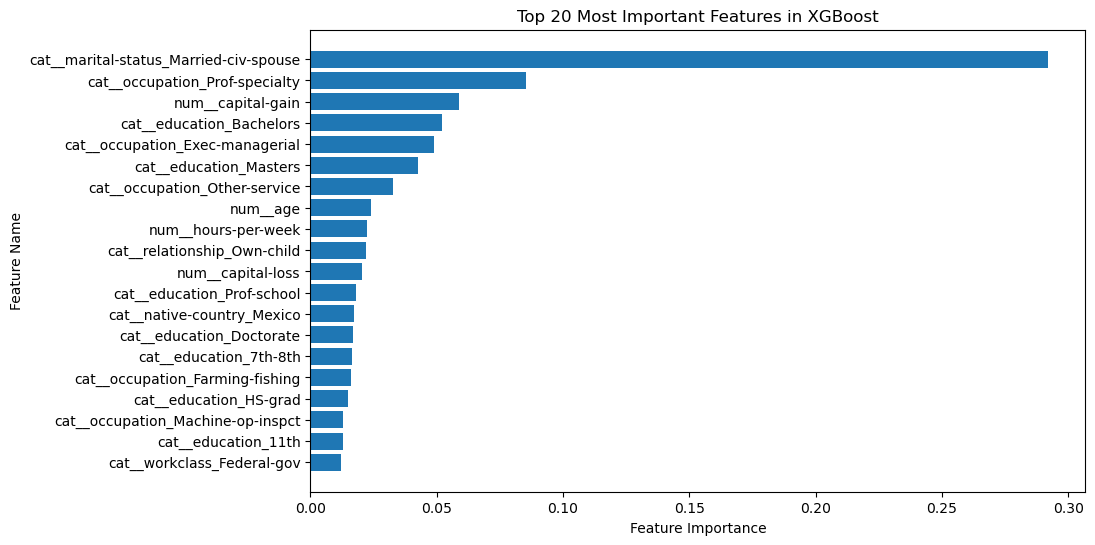

In [97]:
# checking to see which features are most important

rf_pipeline.fit(X_train, y_train)
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Extract feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the trained XGBoost model
importances = xgb_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame and sort by importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Display top 20 features
print(feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 20 Most Important Features on Job Stability")
plt.gca().invert_yaxis()  # Highest at the top
plt.show()



In [98]:
#Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best CV Score: 0.8541051578213498
